# Compare Strategies

We will compares 4 long term trading strategies against each other on the S&P 500:  
buy-and-hold  
golden-cross  
sma-percent-band  
momentum  

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Import Stratagies

In [3]:
sma_percent_band = pf.import_strategy(strategy_name='090.sma-percent-band')
momentum         = pf.import_strategy(strategy_name='180.momentum')
buy_and_hold     = pf.import_strategy(strategy_name='', top_level_dir='pinkfish', module_name='benchmark')
golden_cross     = pf.import_strategy(strategy_name='175.compare-strategies', module_name='golden_cross')

/home/fja0568/src/pinkfish/examples/090.sma-percent-band/strategy.py
/home/fja0568/src/pinkfish/examples/180.momentum/strategy.py
/home/fja0568/src/pinkfish/pinkfish/benchmark.py
/home/fja0568/src/pinkfish/examples/175.compare-strategies/golden_cross.py


Some global data

In [4]:
#symbol = 'SPY'
symbol = '^GSPC'

capital = 10000
#start = datetime.datetime(1900, 1, 1)
start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

Strategies Options

In [5]:
sma_percent_band_options = {
    'use_adj' : True,
    'use_cache' : True,
    'sma' : 200,
    'band' : 3.0
}

momentum_options = {
    'use_adj' : True,
    'use_cache' : True,
    'lookback': None,
    'margin': 1
}

buy_and_hold_options = {
    'use_adj' : True,
}

golden_cross_options = {
    'use_adj' : True,
    'use_cache' : True, 
}

Run Strategies

In [6]:
strategies = pd.Series(dtype=object)

options = buy_and_hold_options
strategies['buy_and_hold'] = buy_and_hold.Strategy(symbol, capital, start, end, use_adj=options['use_adj'])
strategies['buy_and_hold'].run()

options = golden_cross_options
strategies['golden_cross'] = golden_cross.Strategy(symbol, capital, start, end, options)
strategies['golden_cross'].run()

options = sma_percent_band_options
strategies['sma_percent_band'] = sma_percent_band.Strategy(symbol, capital, start, end, options)
strategies['sma_percent_band'].run()

options = momentum_options
strategies['momentum'] = momentum.Strategy(symbol, capital, start, end, options)
strategies['momentum'].run()

Summarize results

In [7]:
metrics = ('start',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'annual_std',
           'pct_time_in_market',
           'trades_per_year',
           'pct_profitable_years',
           'pct_profitable_trades',
           'ending_balance')

df = pf.optimizer_summary(strategies, metrics)
pd.set_option('display.max_columns', len(df.columns))
df

,buy_and_hold,golden_cross,sma_percent_band,momentum
start,1957-03-04,1957-03-04,1957-03-04,1957-08-08
annual_return_rate,7.25,6.53,6.98,6.25
max_closed_out_drawdown,-56.78,-33.92,-25.07,-38.81
annualized_return_over_max_drawdown,0.13,0.19,0.28,0.16
sharpe_ratio,0.51,0.60,0.70,0.59
sortino_ratio,0.66,0.61,0.78,0.63
monthly_std,4.30,3.07,2.92,3.36
annual_std,15.93,11.55,11.84,13.09
pct_time_in_market,100.00,69.43,69.44,74.00
trades_per_year,0.03,0.54,0.54,1.33


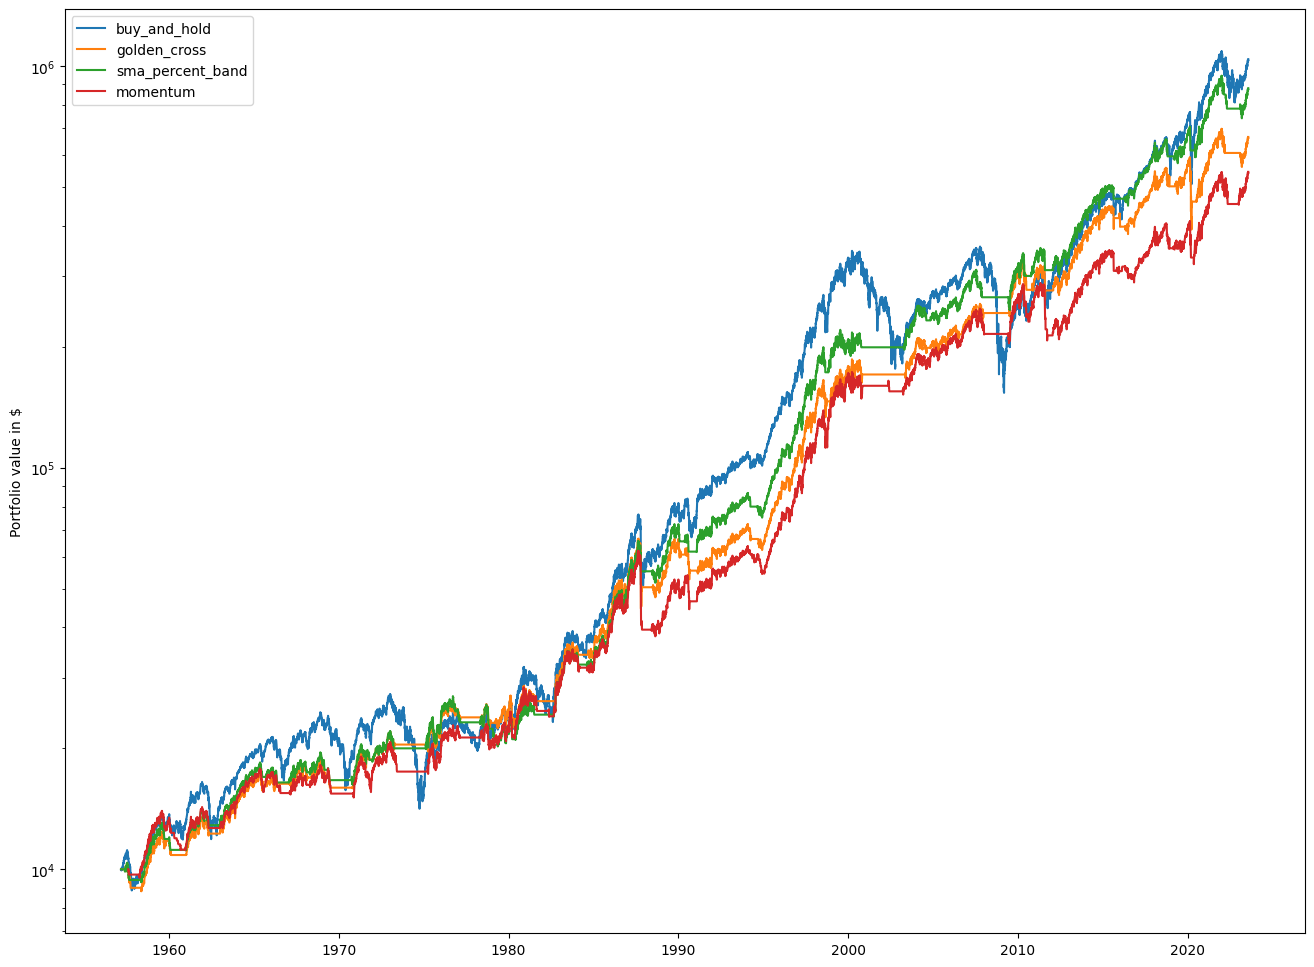

In [8]:
labels = strategies.keys()
pf.plot_equity_curves(strategies, labels=labels, yscale='log')